# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3]:
conda activate ML_Lab_01


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install ucimlrepo

In [7]:
import ucimlrepo as uci
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
dataset = uci.fetch_ucirepo(id=149)

print(dataset.metadata.name, '\n')
print(dataset.metadata.abstract, '\n')
print(dataset.metadata.additional_info.summary, '\n')

Statlog (Vehicle Silhouettes) 

3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. 

The purpose is to classify a given silhouette as one of four types of vehicle, using  a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.  

HISTORY:

This data was originally gathered at the TI in 1986-87 by JP Siebert. It was partially financed by Barr and Stroud Ltd. The original purpose was to find a method of distinguishing 3D objects within a 2D image by application of an ensemble of shape feature extractors to the 2D silhouettes of the objects. Measures of shape features extracted from example silhouettes of objects to be discriminated were used to generate a classification rule tree by means of computer induction.

This object recognition strategy was successfully used to discriminate between silhouettes of model cars, vans and buses viewed from constrained elevati

In [10]:
data = dataset.data.features
target = dataset.data.targets

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 18) (846, 1)
(549, 18) (549, 1) (297, 18) (297, 1)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [14]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
254,93.0,47,85,161,65,12,155,43,19,157,179,354,178,76,2,9,184,196
68,86.0,44,78,164,68,9,142,46,18,147,168,305,171,70,1,11,190,201
56,97.0,44,96,195,63,9,185,36,22,144,202,512,165,66,4,8,191,199
707,92.0,35,58,136,58,6,122,55,17,132,142,222,116,64,6,17,197,203
269,83.0,37,62,113,53,6,122,55,17,129,143,218,135,79,0,7,181,185
828,89.0,42,66,125,53,7,131,51,18,144,162,254,162,73,10,17,188,191
266,86.0,42,65,116,53,6,152,45,19,141,175,335,172,85,5,4,179,183
106,99.0,46,105,209,64,11,197,34,23,152,212,575,159,65,0,33,194,205
599,93.0,39,63,146,58,7,128,52,18,134,149,246,158,63,9,7,198,204
688,89.0,35,52,121,57,4,122,55,17,125,139,220,128,82,5,13,181,184


Methods `describe` and `info` deliver some useful information.

In [16]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.969035,45.114754,82.602914,170.098361,61.728597,8.593807,170.111111,40.657559,20.684882,148.517304,189.528233,446.706740,176.129326,72.371585,6.234973,12.295082,188.907104,195.661202
std,8.146074,6.287482,16.142129,33.799179,7.586311,4.549087,33.707583,7.913264,2.624451,14.751041,31.242424,178.818996,32.915614,7.219473,4.857211,8.975859,6.094490,7.359757
min,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,88.000000,40.000000,70.000000,143.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,93.000000,44.000000,80.000000,170.000000,61.000000,8.000000,158.000000,42.000000,20.000000,146.000000,181.000000,371.000000,175.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,100.000000,51.000000,100.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,218.000000,602.000000,201.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,116.000000,59.000000,112.000000,322.000000,133.000000,55.000000,265.000000,61.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,39.000000,206.000000,211.000000


In [18]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 254 to 646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       549 non-null    float64
 1   CIRCULARITY                       549 non-null    int64  
 2   DISTANCE CIRCULARITY              549 non-null    int64  
 3   RADIUS RATIO                      549 non-null    int64  
 4   PR.AXIS ASPECT RATIO              549 non-null    int64  
 5   MAX.LENGTH ASPECT RATIO           549 non-null    int64  
 6   SCATTER RATIO                     549 non-null    int64  
 7   ELONGATEDNESS                     549 non-null    int64  
 8   PR.AXIS RECTANGULARITY            549 non-null    int64  
 9   MAX.LENGTH RECTANGULARITY         549 non-null    int64  
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    int64  
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    int64  
 12  SCALED RADI

In [20]:
X_train.isnull().sum()

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
dtype: int64

In [56]:
X_train[X_train['COMPACTNESS'].isnull()]

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
752,NaN,100,36,73,199,73,6,162,40,20,127,189,401,125,72,6,19,200


In [58]:
y_train[y_train.index == 752]

,class
752,204


In [22]:
y_train.isnull().sum()

class    0
dtype: int64

In [36]:
y_train['class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

<Axes: xlabel='class', ylabel='count'>

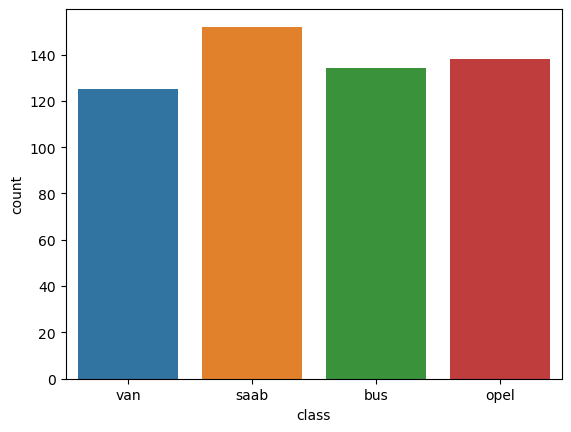

In [44]:
import seaborn as sns

sns.countplot(y_train, x = "class", hue = 'class')

Классы сбалансированы

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [64]:
y_train[y_train.index == 752]

,class
752,204


In [66]:
X_train = X_train.drop(index = 752, axis = 0)
y_train = y_train.drop(index = 752)
X_train.isnull().sum()

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE CIRCULARITY                0
RADIUS RATIO                        0
PR.AXIS ASPECT RATIO                0
MAX.LENGTH ASPECT RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR.AXIS RECTANGULARITY              0
MAX.LENGTH RECTANGULARITY           0
SCALED VARIANCE ALONG MAJOR AXIS    0
SCALED VARIANCE ALONG MINOR AXIS    0
SCALED RADIUS OF GYRATION           0
SKEWNESS ABOUT MAJOR AXIS           0
SKEWNESS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MINOR AXIS           0
KURTOSIS ABOUT MAJOR AXIS           0
HOLLOWS RATIO                       0
dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

1) Удаляем строку, где было нулевое значение 

2) Масштабируем данные, поскольку далее будет пременен PCA

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,  max_iter=500)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
               'C': [0.1, 0.5, 1.0]}


grid_model = GridSearchCV(model, param_grid)
grid_model.fit(scaled_X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.1, 0.5, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [72]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

Accuracy: 0.7643097643097643
F1-score: 0.7588995545517285
              precision    recall  f1-score   support

         bus       0.88      0.94      0.91        80
        opel       0.63      0.63      0.63        83
        saab       0.58      0.51      0.54        67
         van       0.93      0.99      0.96        67

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.75      0.76      0.76       297



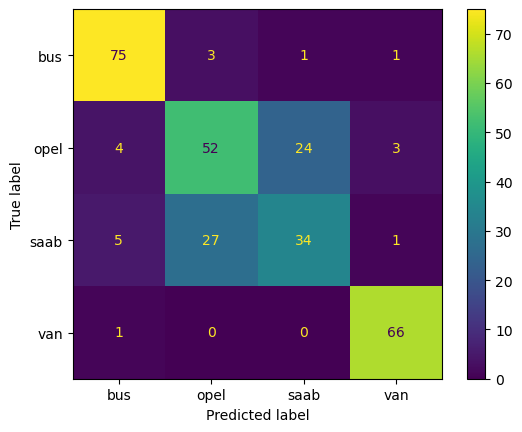

In [87]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, classification_report

y_pred = grid_model.predict(scaled_X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1-score: {f1_score(y_test, y_pred, average='macro')}')

ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

print(classification_report(y_test, y_pred))

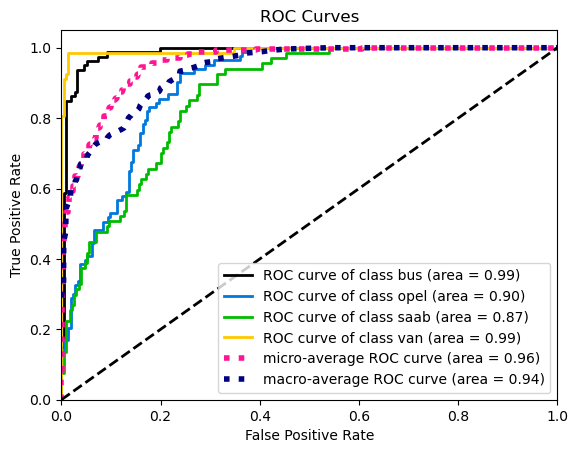

In [89]:
from scikitplot.metrics import plot_roc

y_pred = grid_model.predict_proba(scaled_X_test)

plot_roc(y_test, y_pred)
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

In [110]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(scaled_X_train)

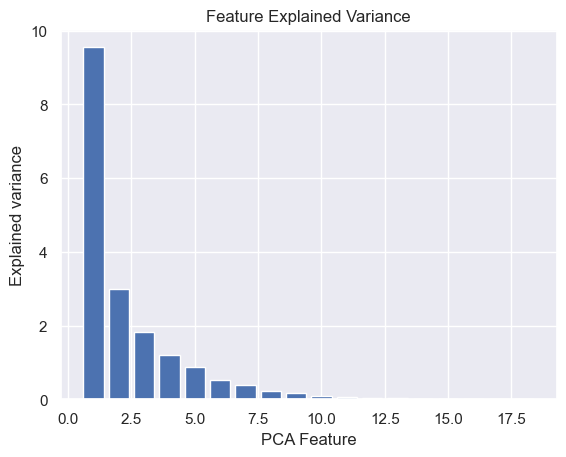

In [112]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
 
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [116]:
pca = PCA(n_components=6)
pca_train = pca.fit_transform(scaled_X_train)
pca_test = pca.transform(scaled_X_test)

Возьмем первые 6 признаков, поскольку в этом случае будет сохраненено наибольшее количество информации при минималном числе признаков

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [165]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=6)), ('LogisticRegression', LogisticRegression(multi_class='multinomial',
                                                                                                         solver='saga',
                                                                                                         tol=1e-3))])
grid_params = {'LogisticRegression__penalty': ['l1', 'l2', 'elasticnet'],
               'LogisticRegression__C': [0.1, 0.5, 1.0]}


grid_model = GridSearchCV(pipe, grid_params)
grid_model.fit(X_train, y_train)
y_pred = grid_model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [167]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.62      0.74      0.67        80
        opel       0.58      0.23      0.33        83
        saab       0.43      0.49      0.46        67
         van       0.68      0.94      0.79        67

    accuracy                           0.59       297
   macro avg       0.58      0.60      0.56       297
weighted avg       0.58      0.59      0.55       297



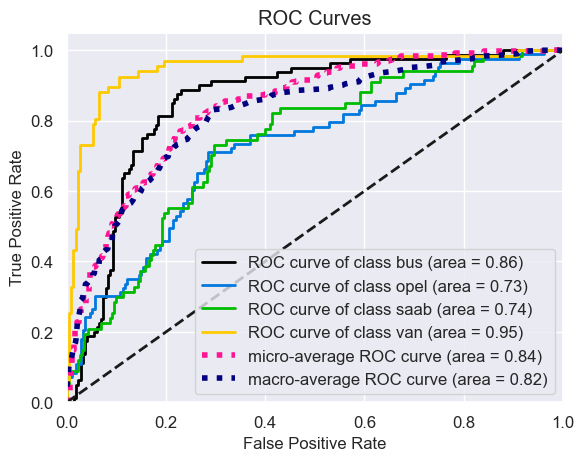

In [169]:
from scikitplot.metrics import plot_roc

y_pred = grid_model.predict_proba(X_test)

plot_roc(y_test, y_pred)
plt.show()

Как можно видеть AUC для всех классов уменьшился, поскольку PCA уменьшил размерность задачи и часть информации была утеряна

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

Tip: there's a function in sklern to do that

In [209]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

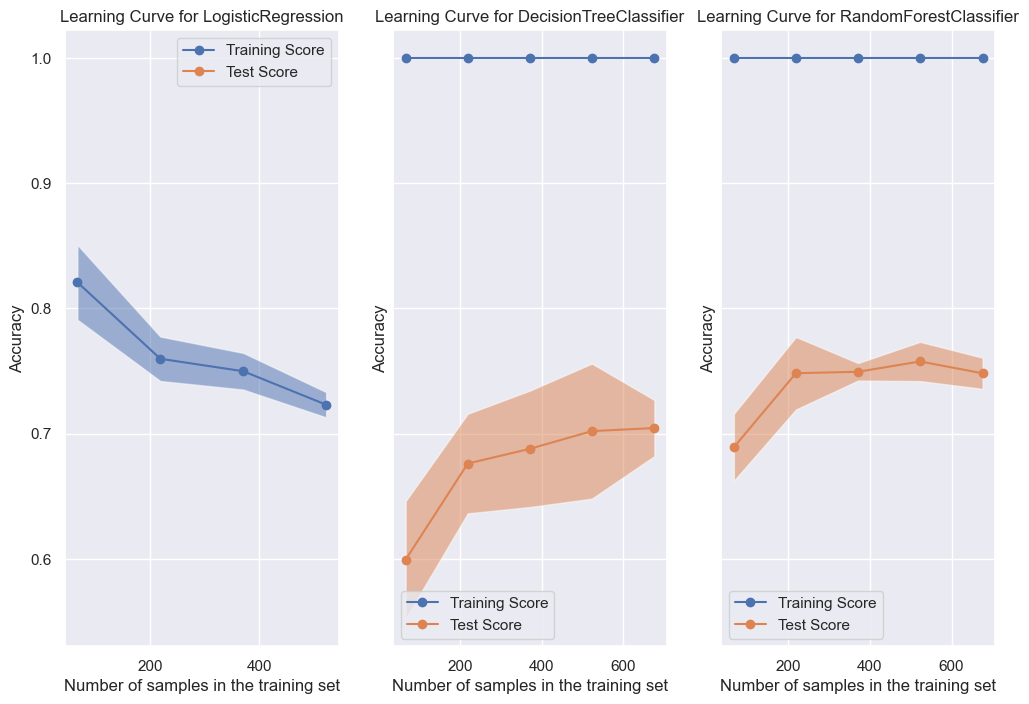

In [239]:
import warnings
warnings.filterwarnings("ignore")

X, y = dataset.data.features, dataset.data.targets


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 8), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}


for ax_idx, estimator in enumerate([LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier()]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

Можно видеть, что 